In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)
train.head()

Train dataset shape: (8523, 12)
Test dataset shape: (5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
print("Missing values in train data:")
print(train.isnull().sum())

print("data types:")
print(train.dtypes)

print("statistical summary:")
print(train.describe())


Missing values in train data:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
data types:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
statistical summary:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_E

In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')
categorical_columns = train.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_columns)
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(train[col].value_counts())


Categorical columns:
Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Value counts for Item_Identifier:
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Value counts for Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Value counts for Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Star

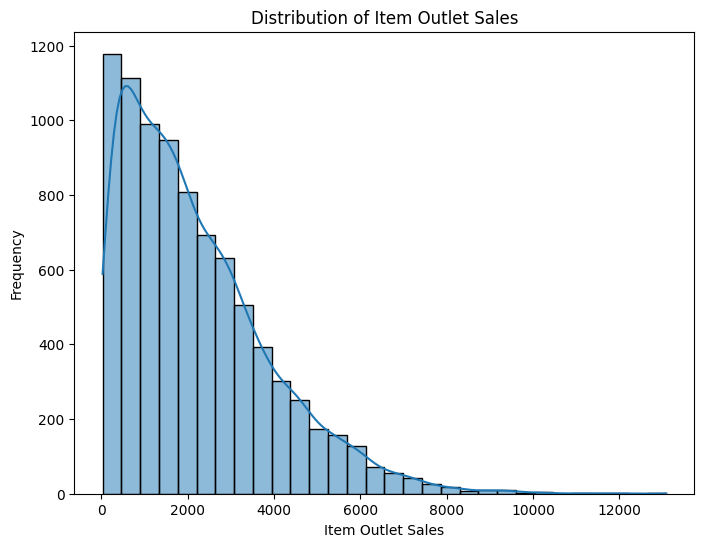

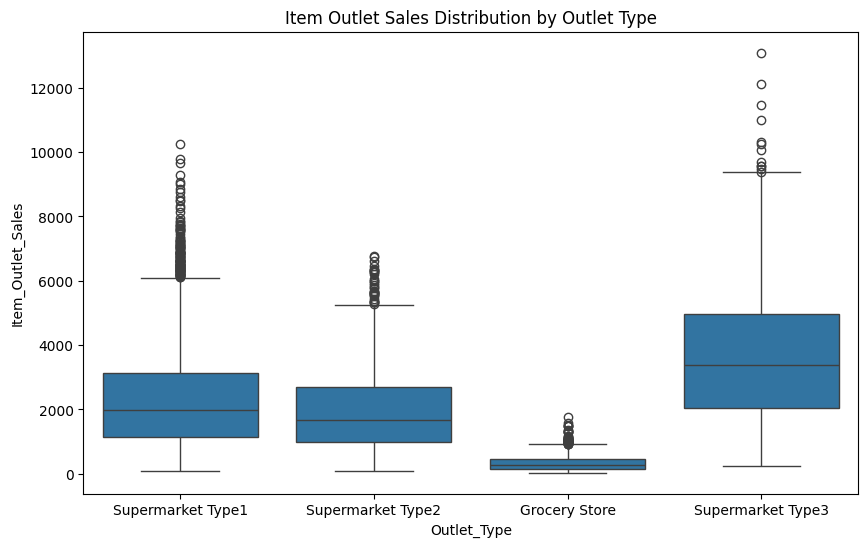

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(train['Item_Outlet_Sales'], kde=True, bins=30)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train)
plt.title('Item Outlet Sales Distribution by Outlet Type')
plt.show()


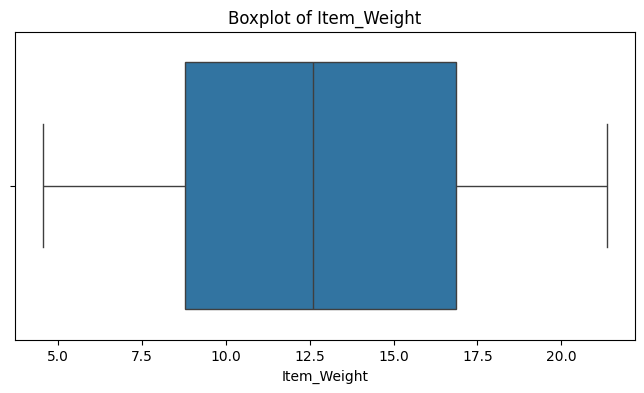

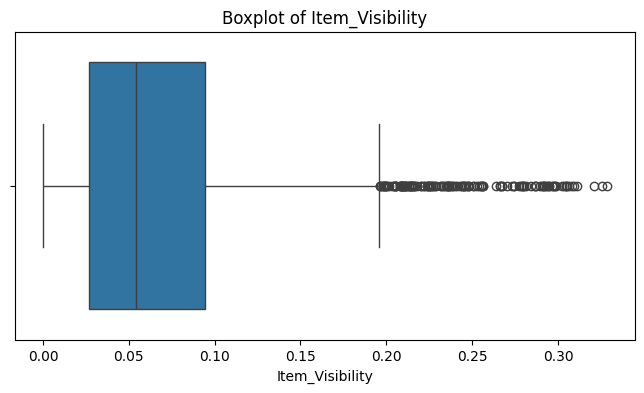

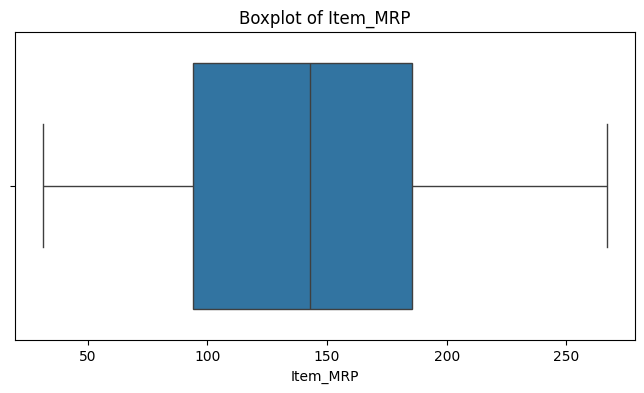

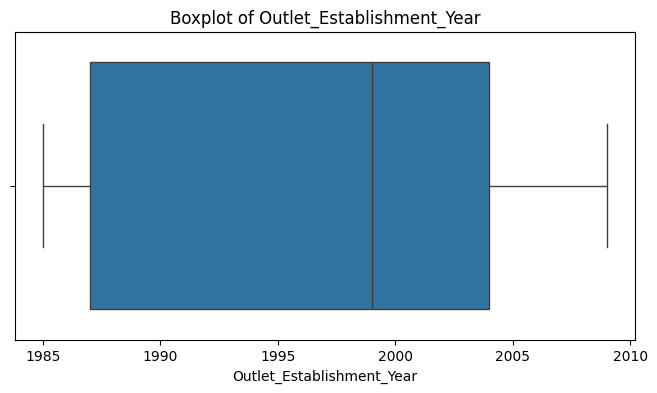

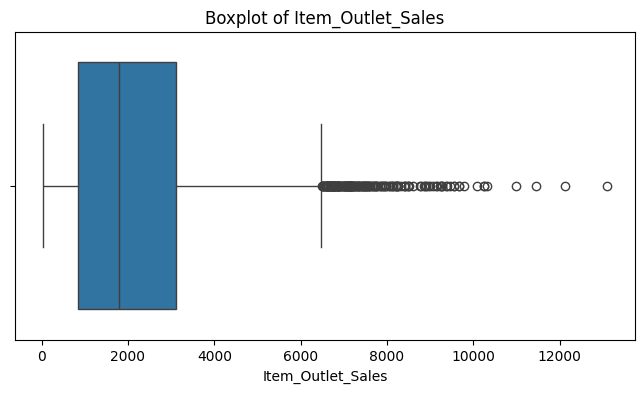

In [ ]:
numerical_columns = train.select_dtypes(include= ['float64','int64']).columns
for col in numerical_columns:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x=train[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_processed = train.copy()

print(train_processed.columns)

for col in train_processed.columns:
    if train_processed[col].dtype == 'object':
        train_processed[col] = train_processed[col].fillna(train_processed[col].mode()[0])
    else:
        train_processed[col] = train_processed[col].fillna(train_processed[col].median())


X = train_processed.drop('Item_Outlet_Sales', axis=1)
y = train_processed['Item_Outlet_Sales']

X = pd.get_dummies(X, drop_first=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results[name] = rmse
    print(f"{name} Validation RMSE: {rmse:.4f}")

print("\nModel Performance Summary:")
for name, rmse in results.items():
    print(f"{name}: RMSE = {rmse:.4f}")

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Linear Regression Validation RMSE: 1273.6907
Decision Tree Validation RMSE: 1466.2510
Random Forest Validation RMSE: 1095.7565
Gradient Boosting Validation RMSE: 1046.8671

Model Performance Summary:
Linear Regression: RMSE = 1273.6907
Decision Tree: RMSE = 1466.2510
Random Forest: RMSE = 1095.7565
Gradient Boosting: RMSE = 1046.8671


In [ ]:
best_model_name = min(results, key=results.get)
print(f"\nBest model: {best_model_name} with RMSE = {results[best_model_name]:.4f}")

best_model = models[best_model_name]


Best model: Gradient Boosting with RMSE = 1046.8671


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Identify categorical and numerical columns
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable from numerical columns
if 'Item_Outlet_Sales' in numerical_cols:
    numerical_cols.remove('Item_Outlet_Sales')

# Preprocessing Pipeline: Handle missing values explicitly
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ]
)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Prepare data
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure no NaN values remain
print("Missing values before transformation:\n", X_train.isnull().sum())

# Training & Evaluation
results = {}
best_model = None
best_rmse = float('inf')

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)

    # Transform validation data
    X_val_transformed = preprocessor.transform(X_val)

    # Ensure no NaNs exist after preprocessing
X_val_transformed = np.asarray(X_val_transformed, dtype=np.float64)
if np.isnan(X_val_transformed).sum() > 0:
    raise ValueError("NaN values detected after preprocessing!")

    y_pred = pipeline.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results[name] = rmse

    print(f"{name} Validation RMSE: {rmse:.4f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = pipeline

print("\nModel Performance Summary:")
for name, rmse in results.items():
    print(f"{name}: RMSE = {rmse:.4f}")

print(f"\nBest model: {best_model.steps[1][1].__class__.__name__} with RMSE = {best_rmse:.4f}")


Missing values before transformation:
 Item_Identifier                 0
Item_Weight                  1174
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1935
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


ValueError: setting an array element with a sequence.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Identify categorical and numerical columns
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target variable from numerical columns
if 'Item_Outlet_Sales' in numerical_cols:
    numerical_cols.remove('Item_Outlet_Sales')

# Preprocessing Pipeline: Handle missing values explicitly
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For OneHotEncoder, we set sparse_output=False to ensure we get a dense array
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ]
)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Prepare data
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print missing values in training set
print("Missing values before transformation:\n", X_train.isnull().sum())

# Training & Evaluation
results = {}
best_model = None
best_rmse = float('inf')

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)

    # Transform validation data
    X_val_transformed = preprocessor.transform(X_val)

    # If the transformed data is sparse, convert it to a dense array
    if hasattr(X_val_transformed, "toarray"):
        X_val_transformed = X_val_transformed.toarray()

    # Check for NaN values after transformation
    if np.isnan(X_val_transformed).sum() > 0:
        raise ValueError("NaN values detected after preprocessing!")

    # Predict and evaluate
    y_pred = pipeline.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results[name] = rmse

    print(f"{name} Validation RMSE: {rmse:.4f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = pipeline

print("\nModel Performance Summary:")
for name, rmse in results.items():
    print(f"{name}: RMSE = {rmse:.4f}")

print(f"\nBest model: {best_model.steps[1][1].__class__.__name__} with RMSE = {best_rmse:.4f}")


Missing values before transformation:
 Item_Identifier                 0
Item_Weight                  1174
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1935
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64
Linear Regression Validation RMSE: 1273.6953
Decision Tree Validation RMSE: 1420.1585
Random Forest Validation RMSE: 1088.2647
Gradient Boosting Validation RMSE: 1039.1897

Model Performance Summary:
Linear Regression: RMSE = 1273.6953
Decision Tree: RMSE = 1420.1585
Random Forest: RMSE = 1088.2647
Gradient Boosting: RMSE = 1039.1897

Best model: GradientBoostingRegressor with RMSE = 1039.1897


In [ ]:
test_predictions = best_model.predict(test)
test_predictions = np.maximum(0, test_predictions)

submission = pd.DataFrame({
    "Item_Identifier": test["Item_Identifier"],
    "Outlet_Identifier": test["Outlet_Identifier"],
    "Item_Outlet_Sales": test_predictions
})

# Save the submission file
submission.to_csv("submission.csv", index=False)
print("Submission file created as submission.csv")


Submission file created as submission.csv
